In [1]:
#import the libraries necessary for this project
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(lubridate)
library(tidyr)
library(forcats)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
#read in the csv. reshape and examine the data
df <- read.csv('valve.csv')
df <- df[,-c(6)]
head(df)

Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,Date,Game_Name
<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>
Sep-21,512350.9,268.96,0.05%,942519,9/1/2021,Counter Strike: Global Offensive
Aug-21,512082.0,6014.60,1.19%,802544,8/1/2021,Counter Strike: Global Offensive
Jul-21,506067.4,-43279.72,-7.88%,763523,7/1/2021,Counter Strike: Global Offensive
Jun-21,549347.1,-110541.81,-16.75%,929940,6/1/2021,Counter Strike: Global Offensive
May-21,659888.9,-63457.63,-8.77%,1087197,5/1/2021,Counter Strike: Global Offensive
Apr-21,723346.5,-17581.31,-2.37%,1148077,4/1/2021,Counter Strike: Global Offensive


In [3]:
#create a column for the year, month and day using the date column and separating the month_year column
df$Day <- as.character(1)

df <- df %>%
separate(col = Month_Year, into = c('Month', 'Year'), sep = '-')

In [4]:
df$Date <- ymd( paste(df$Year, df$Month, df$Day))

In [5]:
#remove na values and find out more about the data using summary
df <- na.omit(df)
summary(df)

    Month               Year            Avg_players           Gain          
 Length:5173        Length:5173        Min.   :      0   Min.   :-250249.0  
 Class :character   Class :character   1st Qu.:   6839   1st Qu.:  -1374.5  
 Mode  :character   Mode  :character   Median :  12408   Median :     -0.1  
                                       Mean   :  37825   Mean   :     92.1  
                                       3rd Qu.:  24141   3rd Qu.:   1255.1  
                                       Max.   :1584887   Max.   : 426446.1  
                                                                            
  Percent_Gain   Peak_Players          Date           
 #NAME? :  12   Min.   :      0   Min.   :2012-08-01  
 -3.35% :   7   1st Qu.:  13218   1st Qu.:2016-11-01  
 -0.96% :   6   Median :  23624   Median :2018-11-01  
 -11.37%:   6   Mean   :  70576   Mean   :2018-06-18  
 11.70% :   6   3rd Qu.:  45971   3rd Qu.:2020-07-01  
 -0.39% :   5   Max.   :3236027   Max.   :2021-09-01  

In [6]:
#make a df out of only the popular games. This is done by taking anything greater than the 3rd quadrant of the peak players 
popular_games <- df %>%
group_by(Game_Name) %>%
filter(Peak_Players > 46102)

head(popular_games)

Month,Year,Avg_players,Gain,Percent_Gain,Peak_Players,Date,Game_Name,Day
<chr>,<chr>,<dbl>,<dbl>,<fct>,<int>,<date>,<fct>,<chr>
Sep,21,512350.9,268.96,0.05%,942519,2021-09-01,Counter Strike: Global Offensive,1
Aug,21,512082.0,6014.60,1.19%,802544,2021-08-01,Counter Strike: Global Offensive,1
Jul,21,506067.4,-43279.72,-7.88%,763523,2021-07-01,Counter Strike: Global Offensive,1
Jun,21,549347.1,-110541.81,-16.75%,929940,2021-06-01,Counter Strike: Global Offensive,1
May,21,659888.9,-63457.63,-8.77%,1087197,2021-05-01,Counter Strike: Global Offensive,1
Apr,21,723346.5,-17581.31,-2.37%,1148077,2021-04-01,Counter Strike: Global Offensive,1


In [7]:
#make a df that sorts the data by the max peak players and the year the peak occured
games_peak <- df %>%
group_by(Game_Name, Year) %>%
summarize(Peak_Player_Count_By_Year = max(Peak_Players)) %>%
arrange(desc(Peak_Player_Count_By_Year))

head(games_peak)

Game_Name,Year,Peak_Player_Count_By_Year
<fct>,<chr>,<int>
PUBG: Battlegrounds,18,3236027
PUBG: Battlegrounds,17,3080769
Counter Strike: Global Offensive,20,1305714
Dota 2,16,1291328
Dota 2,15,1262612
Counter Strike: Global Offensive,21,1198581


In [8]:
#get the top 10 games based on peak players for each year 
top_10_2012 <- games_peak %>%
filter(Year == 12) %>%
head(10)

top_10_2012

Game_Name,Year,Peak_Player_Count_By_Year
<fct>,<chr>,<int>
Dota 2,12,213521
Team Fortress 2,12,117917
Counter-Strike,12,61189
Counter Strike: Global Offensive,12,52261
Sid Meier's Civilization V,12,50891
Left 4 Dead 2,12,48599
Garry's Mod,12,22009
Terraria,12,10799
Spacewar,12,119


In [9]:
top_10_2013 <- games_peak %>%
filter(Year == 13) %>%
head(10)

top_10_2014 <- games_peak %>%
filter(Year == 14) %>%
head(10)

top_10_2015 <- games_peak %>%
filter(Year == 15) %>%
head(10)

top_10_2016 <- games_peak %>%
filter(Year == 16) %>%
head(10)

top_10_2017 <- games_peak %>%
filter(Year == 17) %>%
head(10)

top_10_2018 <- games_peak %>%
filter(Year == 18) %>%
head(10)

top_10_2019 <- games_peak %>%
filter(Year == 19) %>%
head(10)

top_10_2020 <- games_peak %>%
filter(Year == 20) %>%
head(10)

top_10_2021 <- games_peak %>%
filter(Year == 21) %>%
head(10)

In [10]:
#create a df by combining the top 10 from each year
top_10_each_year <- do.call('rbind', list(top_10_2012, top_10_2013,top_10_2014 ,top_10_2015 ,top_10_2016 ,top_10_2017 ,top_10_2018
                                          ,top_10_2019, top_10_2020, top_10_2021  ))
head(top_10_each_year)

Game_Name,Year,Peak_Player_Count_By_Year
<fct>,<chr>,<int>
Dota 2,12,213521
Team Fortress 2,12,117917
Counter-Strike,12,61189
Counter Strike: Global Offensive,12,52261
Sid Meier's Civilization V,12,50891
Left 4 Dead 2,12,48599


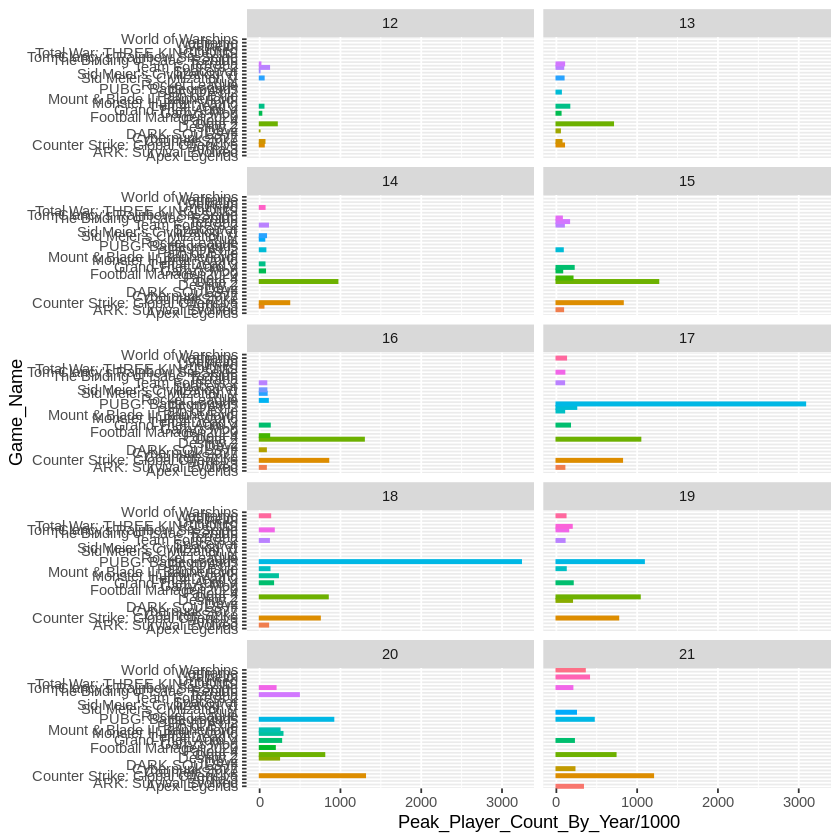

In [11]:
#make a plot to see how each year stacks up against each other. 
#did not like this graph too much because the text was overlapping, but this helped develop the ideas for my future graphs 
ggplot(top_10_each_year, aes(x=Game_Name, y=Peak_Player_Count_By_Year/1000, color = Game_Name, fill = Game_Name)) + geom_bar(stat='identity') +
    scale_x_discrete() + coord_flip() + theme(legend.position='none') + facet_wrap(~Year, ncol=2)

In [12]:
#do the same thing but with less games. I decided to take the top 3 for this next part.
top_3_2012 <- games_peak %>%
filter(Year == 12) %>%
head(3)

top_3_2013 <- games_peak %>%
filter(Year == 13) %>%
head(3)

top_3_2014 <- games_peak %>%
filter(Year == 14) %>%
head(3)
       
top_3_2015 <- games_peak %>%
filter(Year == 15) %>%
head(3)
       
top_3_2016 <- games_peak %>%
filter(Year == 16) %>%
head(3)
       
top_3_2017 <- games_peak %>%
filter(Year == 17) %>%
head(3)
       
top_3_2018 <- games_peak %>%
filter(Year == 18) %>%
head(3)
       
top_3_2019 <- games_peak %>%
filter(Year == 19) %>%
head(3)
       
top_3_2020 <- games_peak %>%
filter(Year == 20) %>%
head(3)
       
top_3_2021 <- games_peak %>%
filter(Year == 21) %>%
head(3)

top_3_each_year <- do.call('rbind', list(top_3_2012, top_3_2013,top_3_2014 ,top_3_2015 ,top_3_2016 ,top_3_2017 ,top_3_2018
                                          ,top_3_2019, top_3_2020, top_3_2021  ))
head(top_3_each_year)

Game_Name,Year,Peak_Player_Count_By_Year
<fct>,<chr>,<int>
Dota 2,12,213521
Team Fortress 2,12,117917
Counter-Strike,12,61189
Dota 2,13,702792
Left 4 Dead 2,13,161590
Terraria,13,97392


In [13]:
#create the color scheme to match each of the games in the top 10 from each year to a specific color
#this makes it so the colors are consistent within each graph
color.scheme <- c("#97233F", "#C9233F", "#2A0365", "#0F4589", "#0088D4", "#DF6108", "#F03A16", "#322820",
  "#0D254C", "#DF6108", "#006DB0", "#313F36", "#B20032", "#163F83", "#007198", "#B20032",
 "#005E6A", "#3B0160", "#0D254C", "#C9B074", "#192E6C", "#313F36", "#C4C8CB", "#003B48",
 "#F2C800", "#0B264D", "#54BA4C", "#840026", "#0D254C", "#B20032", "#4C96C4", "#7A2D39", '#BEAED4', '#FFFF99')

In [14]:
# mapping colors
# dota - 97233F
# tf2 - C9233F
# CS -2A0365
# CSGO - 0F4589
# CIV5 - 0088D4
# L4D - DF6108
# GMOD - F03A16
# Terraria - 322820
# spacewar - 0D254C
# dayz - DF6108
# payday2 - 006DB0
# unturned - 313F36
# rust - B20032
# arma 3 - 163F83
# fallout 4 - 007198
# ark - B20032
# binding - 005E6A
# gta 5 - 3B0160
# RL - 0D254C
# civ6 - C9B074
# darksouls - 192E6C
# pubg - 313F36
# warframe - C4C8CB
# r6 - 003B48
# poe - F2C800
# monsterhunter - 0B264D
# destiny - 54BA4C
# total war - 840026
# mount/blade - 0D254C
# football mgr - B20032
# valheim - 4C96C4
# world of warships - 7A2D39
# apex - BEAED4
# cyberpunk - FFFF99

In [15]:
#create a theme for future graphs to use. This was based off a theme given to us in previous labs in our course.
my_theme_adjusted <- function() {
      
    # Generate the colors for the chart procedurally with RColorBrewer
    palette <- brewer.pal("Greys", n=9) # create a palette of shades of grey 
    color.background = palette[1] # background plot color
    color.grid.major = palette[3] 
    color.grid.minor = palette[2]
    color.axis.text = palette[6] # text color 
    color.axis.title = palette[7]
    color.title = palette[9]
    
    theme_bw(base_size =9)
    
    
    theme(panel.background=element_rect(fill=color.background, color=color.background)) +
    theme(plot.background=element_rect(fill=color.background, color=color.background)) +
    theme(panel.border=element_rect(color=color.background)) +
    
    
        # Format the grid
    theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +
    theme(panel.grid.minor=element_blank()) +
    theme(axis.ticks=element_blank()) +
    
        # Format the legend, but hide by default
#     theme(legend.position="bottom") +
#     theme(legend.background = element_rect(fill=color.background)) +
#     theme(legend.text = element_text(size=7,color=color.axis.title)) +
    
        # Set title and axis labels, and format these and tick marks
    theme(plot.title=element_text(color=color.title, size=10, vjust=1.25)) +
    theme(axis.text.x=element_text(size=7,color=color.axis.text)) +
    theme(axis.text.y=element_text(size=7,color=color.axis.text)) +
    theme(axis.title.x=element_text(size=8,color=color.axis.title, vjust=0)) +
    theme(axis.title.y=element_text(size=8,color=color.axis.title, vjust=1.25)) +
    
    
#         # Set facet attributes
    theme(strip.background = element_rect(fill=color.background, colour = color.background)) +
    theme(strip.text = element_text(size = 15, colour = color.axis.text))

        # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 1.3, 0), "cm"))
    
}

In [16]:
#begin the plotting process with making sure the games are ordered in levels from greatest to least based on peak player numbers
top_3_each_year$Game_Name <- factor(top_3_each_year$Game_Name, levels = 
                         c('Dota 2', 'Counter Strike: Global Offensive', 'PUBG: Battlegrounds',
                        'Team Fortress 2', 'Grand Theft Auto V' , 'Terraria', 'Left 4 Dead 2', 'Counter-Strike'  ))

#match the games to their colors
color_scheme_t3 <- c('#97233F', '#0F4589','#313F36','#C9233F','#3B0160', '#322820','#DF6108','#2A0365')

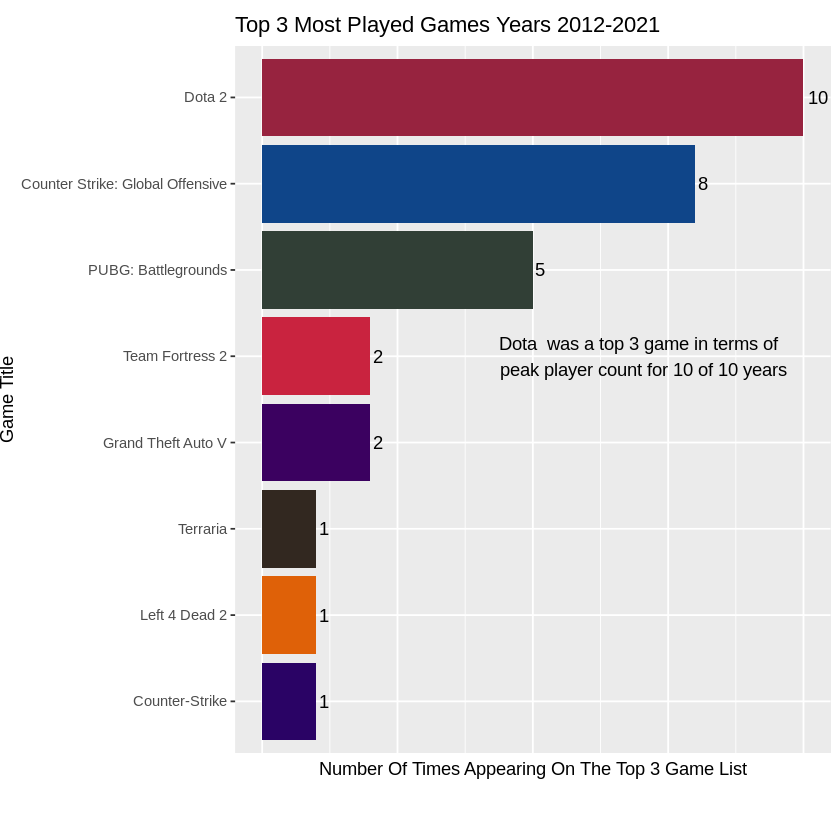

In [17]:
#graph a plot for the top 3 games of each year and how many times the game made the top 3 list
top3 <- ggplot(top_3_each_year, aes(fct_rev(Game_Name), fill=Game_Name)) + geom_bar() +
    scale_fill_manual(values=color_scheme_t3) +
    geom_text(stat='count', aes(label=..count..), hjust=-.25) + coord_flip() + 
    labs(title='Top 3 Most Played Games Years 2012-2021', x='Game Title', y='Number Of Times Appearing On The Top 3 Game List') +
    my_theme_adjusted() + theme(legend.position='none', axis.text.x=element_blank(), axis.ticks.x=element_blank()) +
    annotate('text', x=5, y=7, label='Dota  was a top 3 game in terms of \n peak player count for 10 of 10 years')

top3

In [18]:
#making a df that has the top 3 most popular games and their respective player counts for each year
top_3_games_yr_avg <- df %>%
group_by(Game_Name, Year) %>%
summarise(avg_yearly = sum(Avg_players) /12) %>%
filter(Game_Name == 'Dota 2'| Game_Name == 'Counter Strike: Global Offensive' | Game_Name == 'PUBG: Battlegrounds')
top_3_games_yr_avg

#map the colors for this graph
color_scheme_lg <- c('#0F4589','#97233F','#313F36')

Game_Name,Year,avg_yearly
<fct>,<chr>,<dbl>
Counter Strike: Global Offensive,12,5869.092
Counter Strike: Global Offensive,13,23420.602
Counter Strike: Global Offensive,14,105695.497
Counter Strike: Global Offensive,15,319942.058
Counter Strike: Global Offensive,16,349814.875
Counter Strike: Global Offensive,17,369258.907
Counter Strike: Global Offensive,18,321531.071
Counter Strike: Global Offensive,19,398361.112
Counter Strike: Global Offensive,20,657265.765


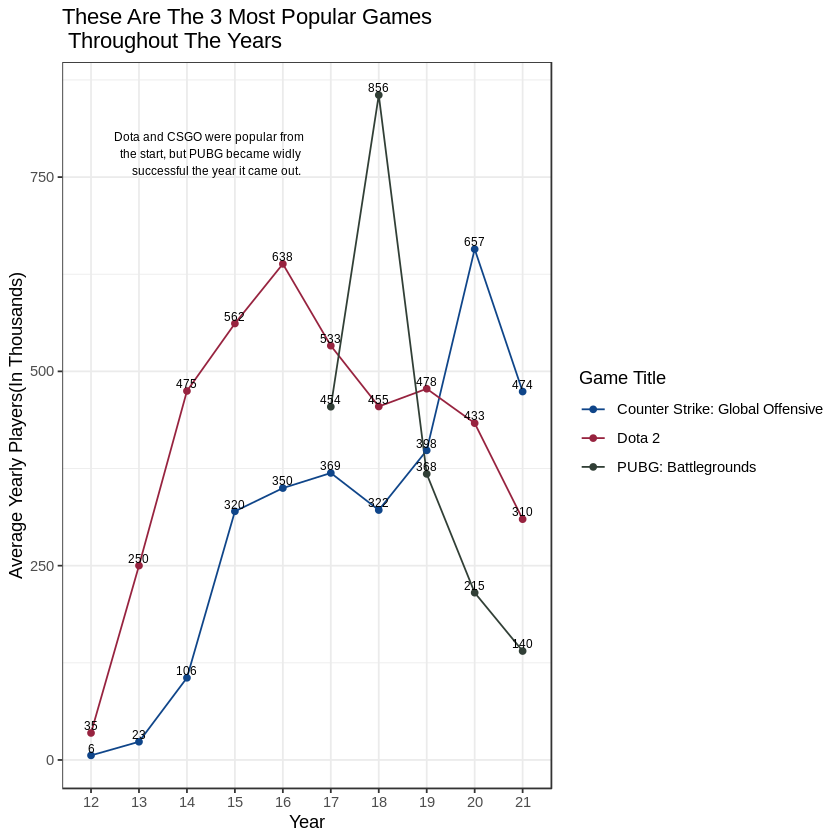

In [19]:
#plotting the top 3 games as a scatter plot with lines connecting the points
pop_games <- ggplot(data = top_3_games_yr_avg, aes(x=Year, y=avg_yearly/1000, group = Game_Name)) + 
    geom_line(aes(color= Game_Name)) + 
    geom_point(aes(color= Game_Name)) + scale_color_manual(values=color_scheme_lg) +
    labs(title = 'These Are The 3 Most Popular Games \n Throughout The Years', x='Year', y='Average Yearly Players(In Thousands)') +
    geom_text(aes(label = round(avg_yearly/1000, digits=0)), vjust = -.3, colour = "black", size = 2.5) +
    guides(color=guide_legend('Game Title')) + theme_bw() +
    annotate('text', x=3.5, y=780, label= 'Dota and CSGO were popular from \n the start, but PUBG became widly 
    successful the year it came out.', size =2.5)
    
pop_games

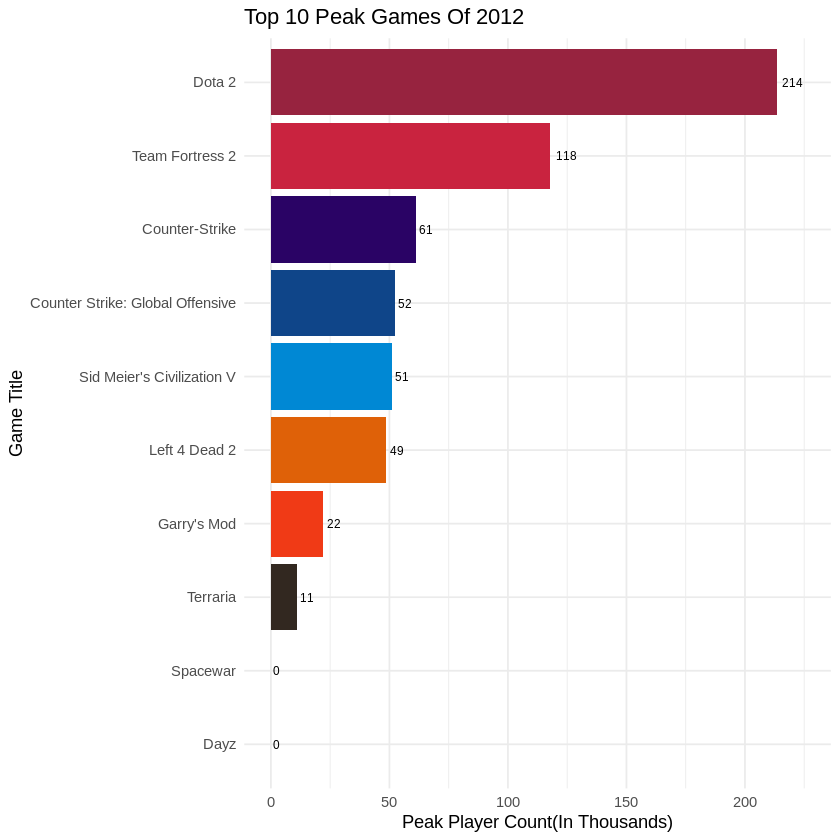

In [20]:
#create a bar chart for top 10 games of 2012 and repeat for each year 
top_10_2012$Game_Name <- factor(top_10_2012$Game_Name, levels = 
                               c('Dota 2', 'Team Fortress 2', 'Counter-Strike', 'Counter Strike: Global Offensive',
                       'Sid Meier\'s Civilization V' ,'Left 4 Dead 2', 'Garry\'s Mod', 'Terraria', 'Spacewar', 'Dayz'))

#align the colors to the games
color_scheme_12 <- c('#97233F','#C9233F','#2A0365','#0F4589','#0088D4', '#DF6108', '#F03A16','#322820','#0D254C','#DF6108'  )

#plot the data
y2012 <- ggplot(top_10_2012, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_12) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = -.25, colour = "black", size=2.5) +
    ylim (c(0,225)) + 
    labs(title='Top 10 Peak Games Of 2012' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

y2012

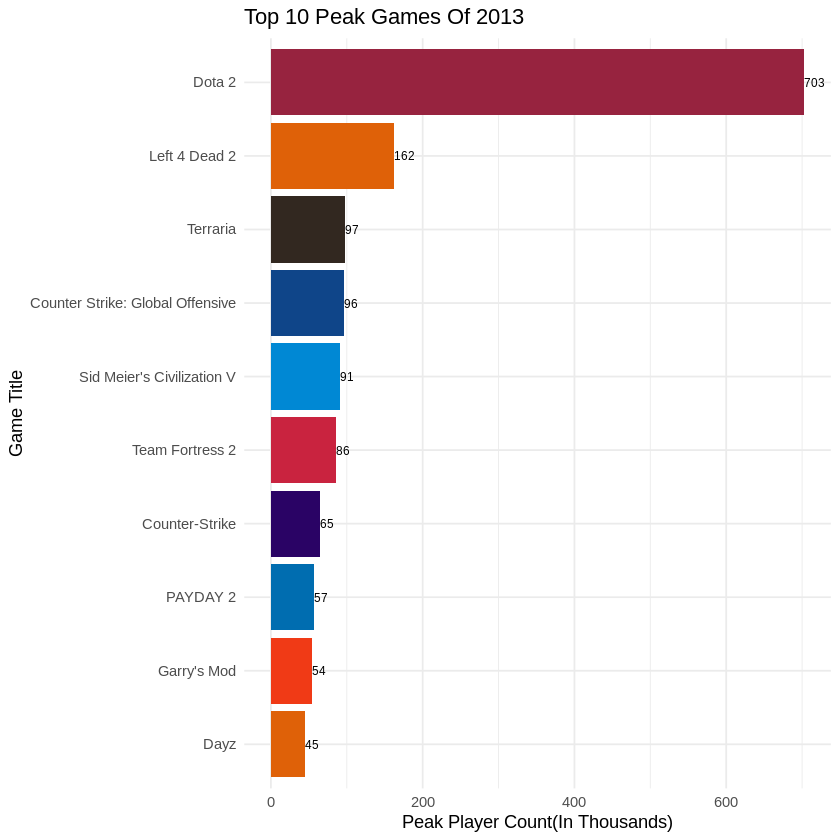

In [21]:
top_10_2013$Game_Name <- factor(top_10_2013$Game_Name, levels = 
                               c('Dota 2', 'Left 4 Dead 2', 'Terraria', 'Counter Strike: Global Offensive',
                       'Sid Meier\'s Civilization V' , 'Team Fortress 2', 'Counter-Strike', 'PAYDAY 2', 'Garry\'s Mod', 'Dayz'))

color_scheme_13 <- c('#97233F','#DF6108','#322820','#0F4589','#0088D4','#C9233F','#2A0365','#006DB0','#F03A16','#DF6108'  )

y2013 <- ggplot(top_10_2013, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_13) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2013' ,x='Game Title' ,y='Peak Player Count(In Thousands)')
y2013

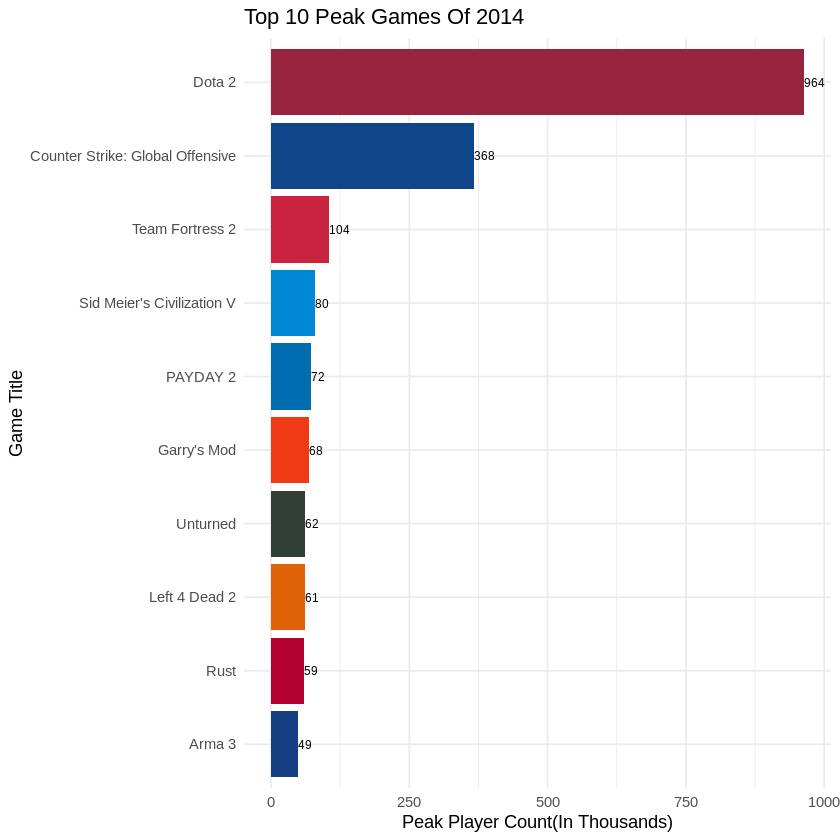

In [22]:
top_10_2014$Game_Name <- factor(top_10_2014$Game_Name, levels = 
                               c('Dota 2', 'Counter Strike: Global Offensive', 'Team Fortress 2', 'Sid Meier\'s Civilization V' , 
                                'PAYDAY 2', 'Garry\'s Mod', 'Unturned', 'Left 4 Dead 2', 'Rust', 'Arma 3'))

color_scheme_14 <- c('#97233F','#0F4589','#C9233F','#0088D4','#006DB0','#F03A16','#313F36','#DF6108','#B20032','#163F83'   )

y2014 <- ggplot(top_10_2014, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_14) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2014' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

y2014

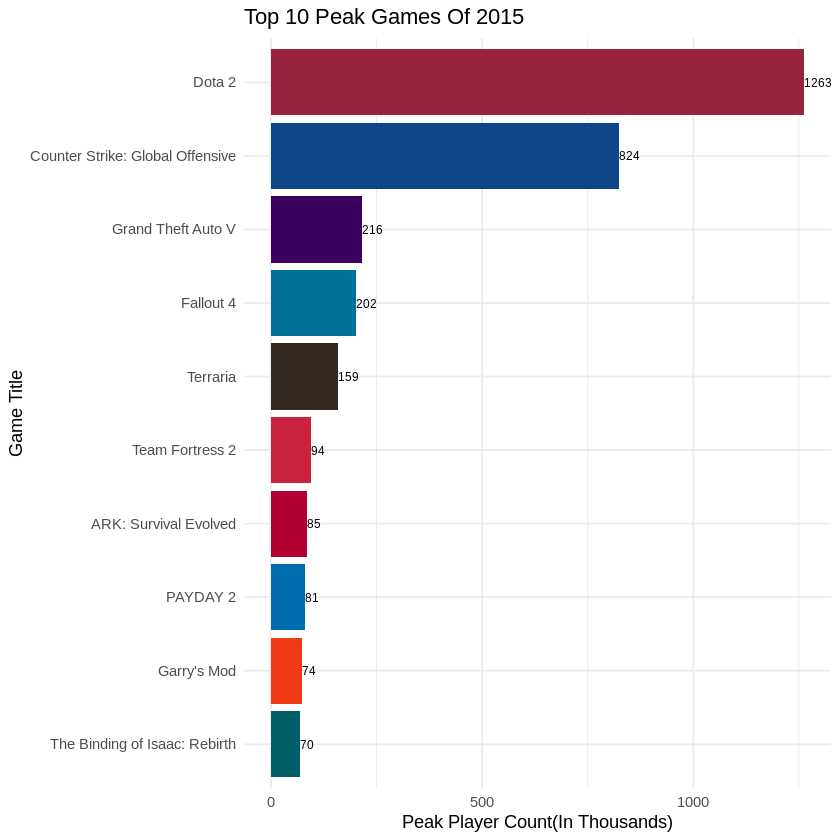

In [23]:
top_10_2015$Game_Name <- factor(top_10_2015$Game_Name, levels = 
                               c('Dota 2', 'Counter Strike: Global Offensive', 'Grand Theft Auto V', 'Fallout 4' , 
                        'Terraria', 'Team Fortress 2', 'ARK: Survival Evolved', 'PAYDAY 2', 'Garry\'s Mod', 'The Binding of Isaac: Rebirth'))

color_scheme_15 <- c('#97233F','#0F4589','#3B0160','#007198','#322820','#C9233F','#B20032','#006DB0','#F03A16','#005E6A')

y2015 <- ggplot(top_10_2015, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_15) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2015' ,x='Game Title' ,y='Peak Player Count(In Thousands)')
y2015

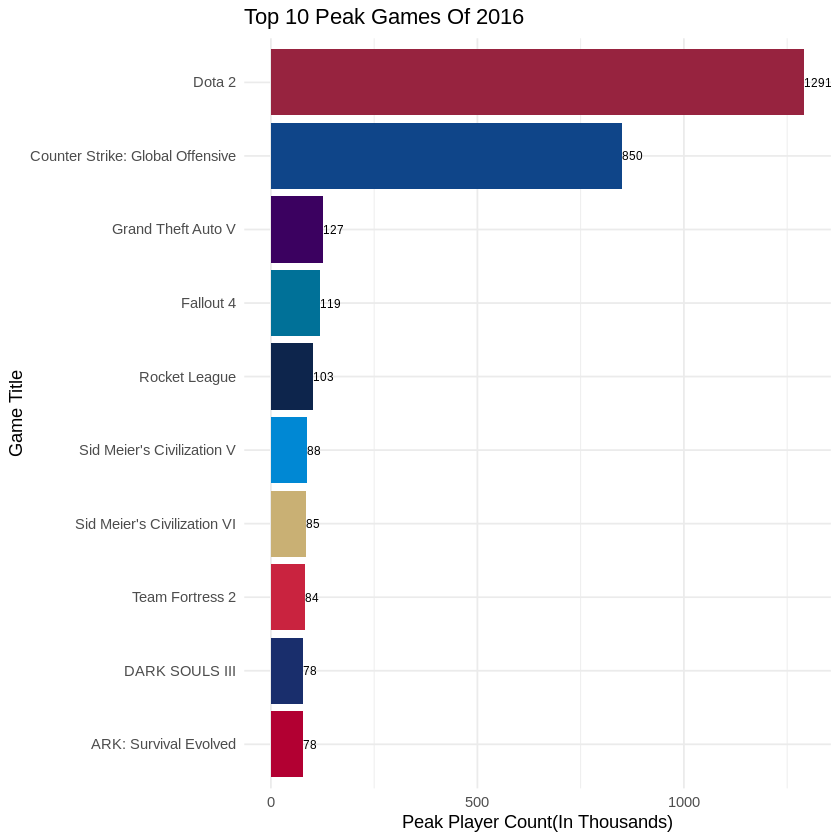

In [24]:
top_10_2016$Game_Name <- factor(top_10_2016$Game_Name, levels = 
                               c('Dota 2', 'Counter Strike: Global Offensive', 'Grand Theft Auto V', 'Fallout 4' , 
                        'Rocket League', 'Sid Meier\'s Civilization V', 'Sid Meier\'s Civilization VI', 'Team Fortress 2', 
                        'DARK SOULS III', 'ARK: Survival Evolved'))

color_scheme_16 <- c('#97233F','#0F4589','#3B0160','#007198','#0D254C','#0088D4','#C9B074','#C9233F','#192E6C' ,'#B20032'  )

y2016 <- ggplot(top_10_2016, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_16) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2016' ,x='Game Title' ,y='Peak Player Count(In Thousands)')
y2016

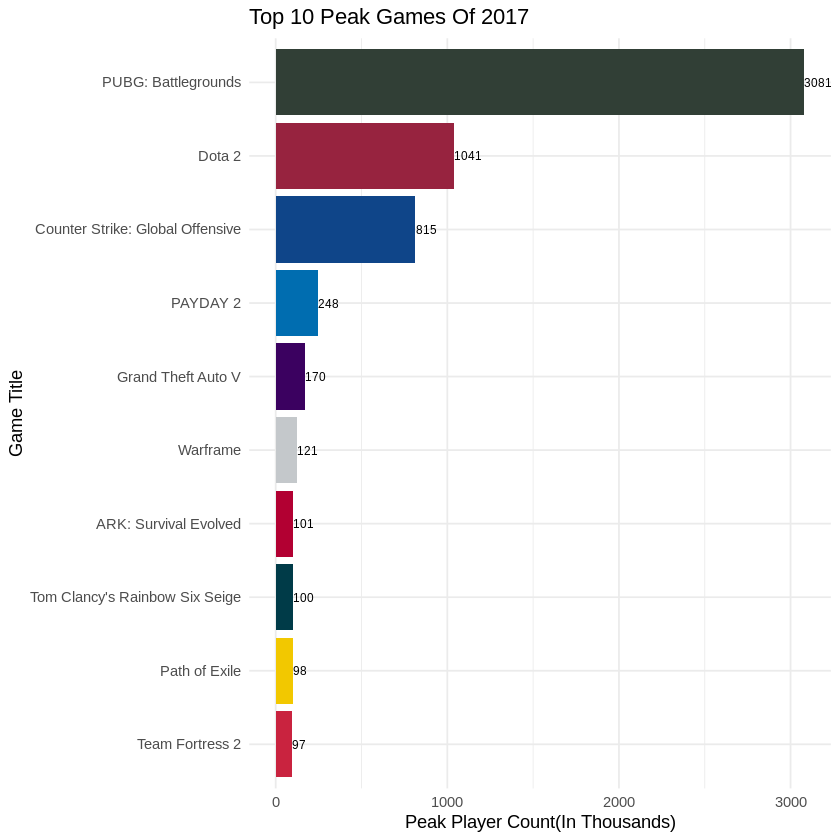

In [25]:
top_10_2017$Game_Name <- factor(top_10_2017$Game_Name, levels = 
                               c('PUBG: Battlegrounds', 'Dota 2', 'Counter Strike: Global Offensive', 'PAYDAY 2', 
                        'Grand Theft Auto V' , 'Warframe', 'ARK: Survival Evolved', 'Tom Clancy\'s Rainbow Six Seige', 
                        'Path of Exile', 'Team Fortress 2'))

color_scheme_17 <- c('#313F36','#97233F','#0F4589','#006DB0','#3B0160','#C4C8CB','#B20032','#003B48','#F2C800','#C9233F')

y2017 <- ggplot(top_10_2017, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_17) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2017' ,x='Game Title' ,y='Peak Player Count(In Thousands)')
y2017

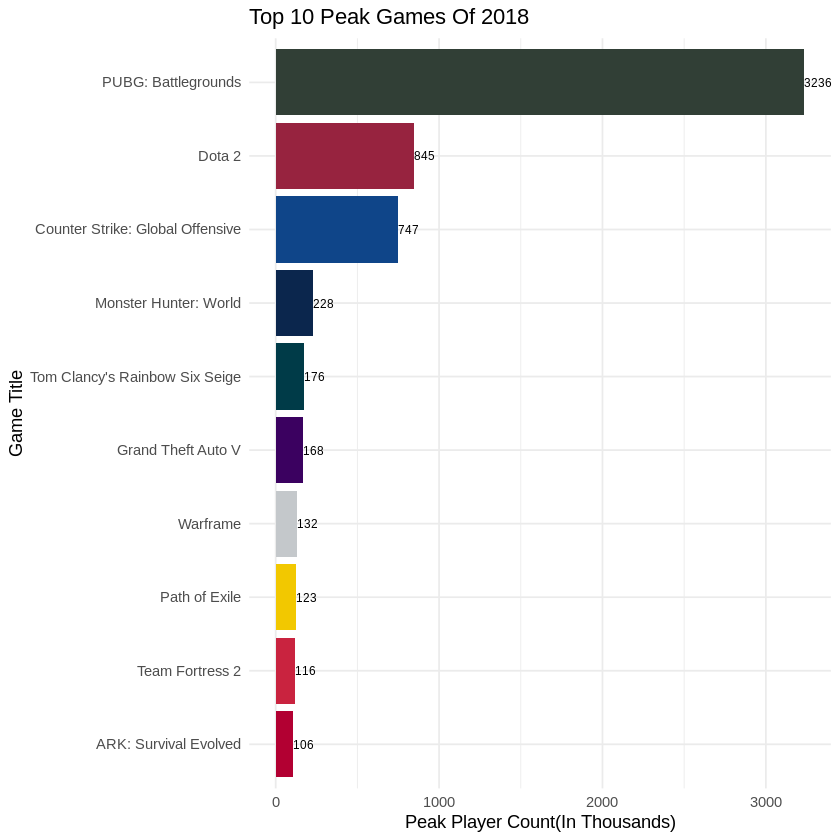

In [26]:
top_10_2018$Game_Name <- factor(top_10_2018$Game_Name, levels = 
                               c('PUBG: Battlegrounds', 'Dota 2', 'Counter Strike: Global Offensive', 'Monster Hunter: World', 
                        'Tom Clancy\'s Rainbow Six Seige', 'Grand Theft Auto V', 'Warframe', 
                        'Path of Exile', 'Team Fortress 2', 'ARK: Survival Evolved'))

color_scheme_18 <- c('#313F36','#97233F','#0F4589','#0B264D','#003B48','#3B0160','#C4C8CB','#F2C800','#C9233F','#B20032' )

y2018 <- ggplot(top_10_2018, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_18) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2018' ,x='Game Title' ,y='Peak Player Count(In Thousands)')
y2018

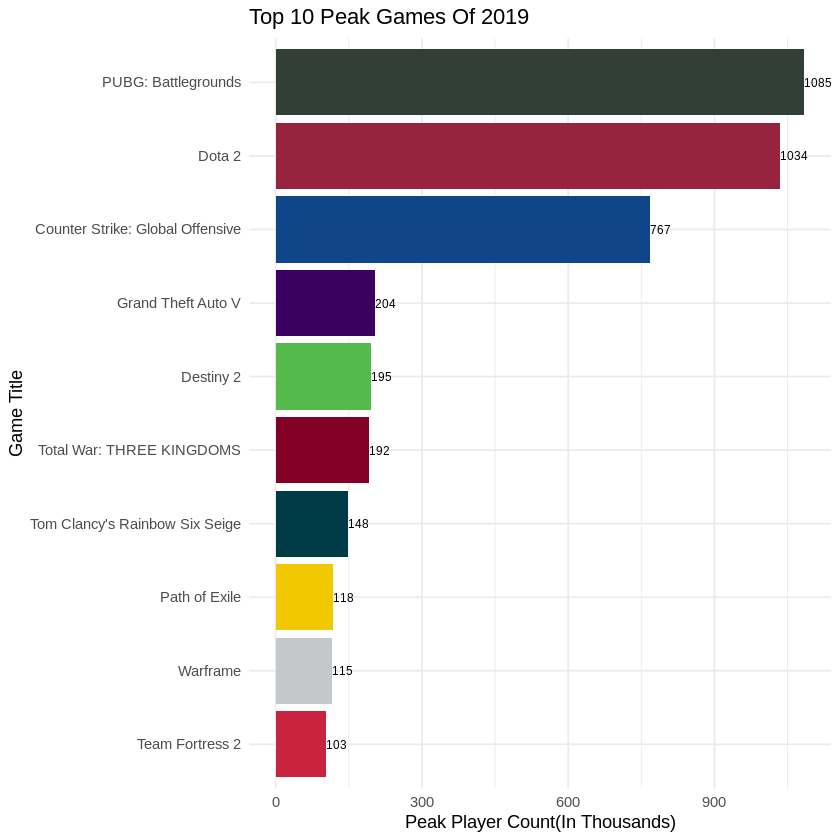

In [27]:
top_10_2019$Game_Name <- factor(top_10_2019$Game_Name, levels = 
                               c('PUBG: Battlegrounds', 'Dota 2', 'Counter Strike: Global Offensive', 'Grand Theft Auto V', 
                        'Destiny 2', 'Total War: THREE KINGDOMS', 'Tom Clancy\'s Rainbow Six Seige', 
                        'Path of Exile', 'Warframe', 'Team Fortress 2'))

color_scheme_19 <- c('#313F36','#97233F','#0F4589','#3B0160','#54BA4C','#840026','#003B48','#F2C800','#C4C8CB','#C9233F')

y2019 <- ggplot(top_10_2019, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_19) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2019' ,x='Game Title' ,y='Peak Player Count(In Thousands)')
y2019

In [28]:
#this game in 2020 had issues being plotted due to the pasing of the csv. I had to change the name of it as a vector 
#then change it back to a factor to match the color coding
top_10_2020$Game_Name <- as.vector(top_10_2020$Game_Name)
top_10_2020$Game_Name[7] <- 'Mount & Blade II: Bannerlord'
top_10_2020$Game_Name <- as.factor(top_10_2020$Game_Name)

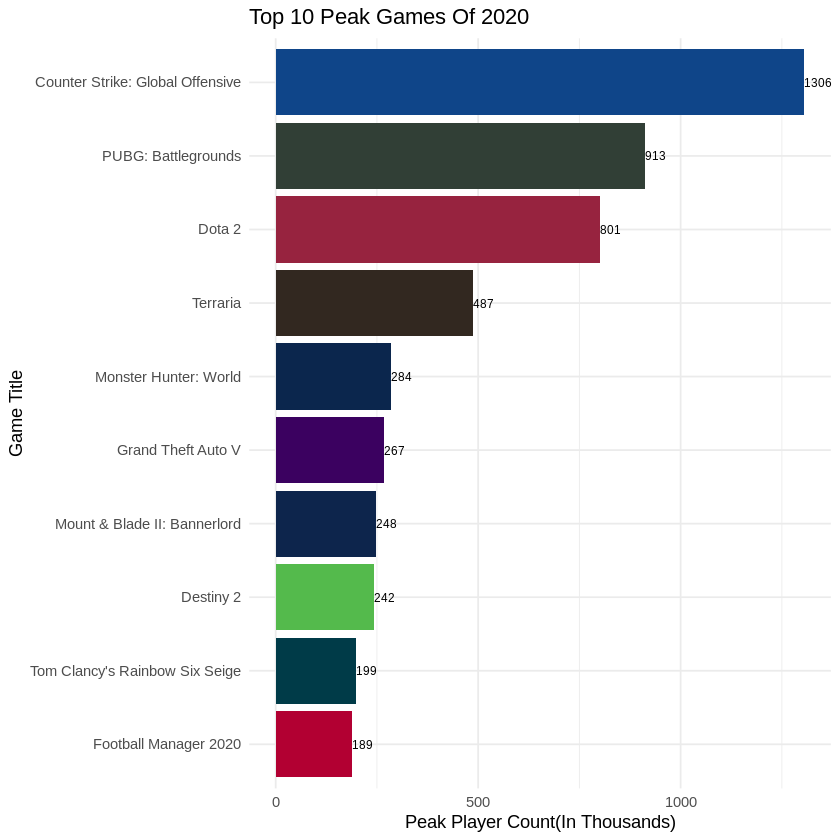

In [29]:
top_10_2020$Game_Name <- factor(top_10_2020$Game_Name, levels = 
                               c('Counter Strike: Global Offensive', 'PUBG: Battlegrounds', 'Dota 2', 'Terraria', 
                        'Monster Hunter: World', 'Grand Theft Auto V', 'Mount & Blade II: Bannerlord', 'Destiny 2',
                        'Tom Clancy\'s Rainbow Six Seige', 'Football Manager 2020'))

color_scheme_20 <- c('#0F4589','#313F36','#97233F','#322820','#0B264D','#3B0160','#0D254C','#54BA4C','#003B48','#B20032')

y2020 <- ggplot(top_10_2020, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_20) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2020' ,x='Game Title' ,y='Peak Player Count(In Thousands)')
y2020

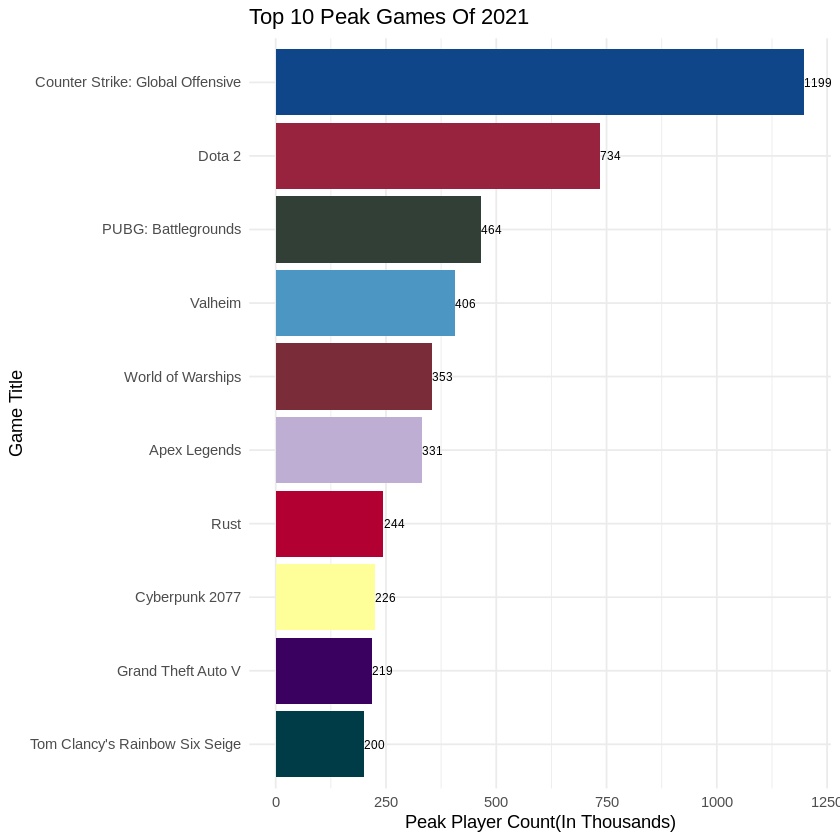

In [30]:
top_10_2021$Game_Name <- factor(top_10_2021$Game_Name, levels = 
                               c('Counter Strike: Global Offensive', 'Dota 2', 'PUBG: Battlegrounds', 'Valheim',
                        'World of Warships', 'Apex Legends', 'Rust', 'Cyberpunk 2077', 'Grand Theft Auto V',
                        'Tom Clancy\'s Rainbow Six Seige'))

color_scheme_21 <- c('#0F4589','#97233F','#313F36','#4C96C4','#7A2D39','#BEAED4','#B20032','#FFFF99','#3B0160','#003B48')

y2021 <- ggplot(top_10_2021, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_21) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2021' ,x='Game Title' ,y='Peak Player Count(In Thousands)')
y2021

In [31]:
#saving each file as a png to make a powerpoint presentation 
png(filename = 'top3.png')

 ggplot(top_3_each_year, aes(fct_rev(Game_Name), fill=Game_Name)) + geom_bar() +
    scale_fill_manual(values=color_scheme_t3) +
    geom_text(stat='count', aes(label=..count..), hjust=-.25) + coord_flip() + 
    labs(title='Top 3 Most Played Games Years 2012-2021', x='Game Title', y='Number Of Times Appearing On The Top 3 Game List') +
    my_theme_adjusted() + theme(legend.position='none', axis.text.x=element_blank(), axis.ticks.x=element_blank()) +
    annotate('text', x=5, y=7, label='Dota  was a top 3 game in terms of \n peak player count for 10 of 10 years')

dev.off()

png 
  2

In [32]:
png(filename = 'pop_games.png')

ggplot(data = top_3_games_yr_avg, aes(x=Year, y=avg_yearly/1000, group = Game_Name)) + 
    geom_line(aes(color= Game_Name)) + 
    geom_point(aes(color= Game_Name)) + scale_color_manual(values=color_scheme_lg) +
    labs(title = 'These Are The 3 Most Popular Games \n Throughout The Years', x='Year', y='Average Yearly Players(In Thousands)') +
    geom_text(aes(label = round(avg_yearly/1000, digits=0)), vjust = -.3, colour = "black", size = 2.5) +
    guides(color=guide_legend('Game Title')) + theme_bw() +
    annotate('text', x=3.5, y=780, label= 'Dota and CSGO were popular from \n the start, but PUBG became widly 
    successful the year it came out.', size =2.5)

dev.off()

png 
  2

In [33]:
png(filename = 'year2012.png')

ggplot(top_10_2012, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_12) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = -.25, colour = "black", size=2.5) +
    ylim (c(0,225)) + 
    labs(title='Top 10 Peak Games Of 2012' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [34]:
png(filename = 'year2013.png')

ggplot(top_10_2013, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_13) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2013' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [35]:
png(filename = 'year2014.png')

ggplot(top_10_2014, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_14) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2014' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [36]:
png(filename = 'year2015.png')

ggplot(top_10_2015, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_15) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2015' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [37]:
png(filename = 'year2016.png')

ggplot(top_10_2016, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_16) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2016' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [38]:
png(filename = 'year2017.png')

ggplot(top_10_2017, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_17) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2017' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [39]:
png(filename = 'year2018.png')

ggplot(top_10_2018, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_18) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2018' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [40]:
png(filename = 'year2019.png')

ggplot(top_10_2019, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_19) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2019' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [41]:
png(filename = 'year2020.png')

ggplot(top_10_2020, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_20) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2020' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2

In [42]:
png(filename = 'year2021.png')

ggplot(top_10_2021, aes(fct_rev(Game_Name), y=Peak_Player_Count_By_Year/1000, fill=Game_Name)) + geom_bar(stat='identity') +
    scale_fill_manual(values=color_scheme_21) + theme_minimal() + coord_flip() + theme(legend.position='none') +
    geom_text(aes(label = round(Peak_Player_Count_By_Year/1000, digits=0)), hjust = 0, colour = "black", size = 2.5) +
    labs(title='Top 10 Peak Games Of 2021' ,x='Game Title' ,y='Peak Player Count(In Thousands)')

dev.off()

png 
  2